In [1]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.lancaster import LancasterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from pandas import Series
import networkx as nx
from PIL import Image
import seaborn as sns
import datetime as dt
import nltk, string
import pandas as pd
import numpy as np
import nltk as nlp
import datetime
import warnings
import calendar
import sys
import os
import re
import pandas as pd

In [2]:
df=pd.read_csv('keywords_new.csv')

In [3]:
df.head()

,_id,created_at,id,text,source,truncated,user.id,user.location,user.created_at,user.geo_enabled,geo,place,retweeted_status.place,retweet_count,favorite_count,entities.hashtags,entities.user_mentions,timestamp_ms
0,5f84d7835785643da5d86bc8,Mon Oct 12 22:23:58 +0000 2020,1315780274890903560,RT @realDonaldTrump: “I’m running as a proud D...,"<a href=""http://twitter.com/download/android"" ...",False,1912233378,Nigeria,Fri Sep 27 20:52:54 +0000 2013,False,NaN,NaN,NaN,0,0,[],"[{""screen_name"":""realDonaldTrump"",""name"":""Dona...",1602541438206
1,5f84d7835785643da5d86bca,Mon Oct 12 22:23:58 +0000 2020,1315780274752548866,RT @ProjectLincoln: You literally have covid a...,"<a href=""http://twitter.com/download/iphone"" r...",False,1016619892731236352,"East Rutherford, NJ",Tue Jul 10 09:47:25 +0000 2018,True,NaN,NaN,NaN,0,0,[],"[{""screen_name"":""ProjectLincoln"",""name"":""The L...",1602541438173
2,5f84d7835785643da5d86bcc,Mon Oct 12 22:23:58 +0000 2020,1315780274848899072,"RT @TheDemCoalition: ""America has its own uniq...","<a href=""http://twitter.com/download/iphone"" r...",False,80955134,"Portland, Oregon",Thu Oct 08 22:01:47 +0000 2009,True,NaN,NaN,NaN,0,0,[],"[{""screen_name"":""TheDemCoalition"",""name"":""Demo...",1602541438196
3,5f84d7835785643da5d86bce,Mon Oct 12 22:23:58 +0000 2020,1315780274677051399,@r_a_salvatore @JoeBiden Not the point. Biden ...,"<a href=""http://twitter.com/download/iphone"" r...",True,2500867475,Near the coffee ☕️,Tue Apr 22 02:03:34 +0000 2014,False,NaN,NaN,NaN,0,0,[],"[{""screen_name"":""r_a_salvatore"",""name"":""R.A. S...",1602541438155
4,5f84d7835785643da5d86bd0,Mon Oct 12 22:23:58 +0000 2020,1315780274731585536,RT @TeamTrump: Vice President @Mike_Pence: Whe...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,1398126522,Tarheel State,Thu May 02 20:35:49 +0000 2013,False,NaN,NaN,NaN,0,0,[],"[{""screen_name"":""TeamTrump"",""name"":""Team Trump...",1602541438168


In [4]:
df=df[['id','created_at','text','user.location']]
df=df.rename(columns={"user.location":"location"})


In [5]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [7]:
df['text'] = df['text'].apply(lambda x: clean_tweets(x))

In [8]:
df.head()

,id,created_at,text,location
0,1315780274890903560,Mon Oct 12 22:23:58 +0000 2020,"“I’m running as a proud Democrat, for the Sen...",Nigeria
1,1315780274752548866,Mon Oct 12 22:23:58 +0000 2020,You literally have covid and are going to Flo...,"East Rutherford, NJ"
2,1315780274848899072,Mon Oct 12 22:23:58 +0000 2020,"""America has its own unique, dangerous form o...","Portland, Oregon"
3,1315780274677051399,Mon Oct 12 22:23:58 +0000 2020,Not the point. Biden is telling voters they ...,Near the coffee ☕️
4,1315780274731585536,Mon Oct 12 22:23:58 +0000 2020,Vice President : Where Joe Biden is talking a...,Tarheel State


In [9]:
df['subject']="x"
for i,k in enumerate(df['text']):
    if ("biden" or "joe") in k.lower():
        df['subject'][i]='Biden'
       # df['relevant'][i]=True
    if ("trump" or "donald" or 'president') in k.lower():
        df['subject'][i]='Trump'
        #df['relevant'][i]=True

    if ('dems' or "democrats" or "left" or"democratic") in k.lower():
        df['subject'][i]='Biden'
        #df['relevant'][i]=True

    if ("republicans" or "reps" or "right") in k.lower():
        df['subject'][i]='Trump'
        #df['relevant'][i]=True

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users

In [10]:
df.head()

,id,created_at,text,location,subject
0,1315780274890903560,Mon Oct 12 22:23:58 +0000 2020,"“I’m running as a proud Democrat, for the Sen...",Nigeria,Biden
1,1315780274752548866,Mon Oct 12 22:23:58 +0000 2020,You literally have covid and are going to Flo...,"East Rutherford, NJ",x
2,1315780274848899072,Mon Oct 12 22:23:58 +0000 2020,"""America has its own unique, dangerous form o...","Portland, Oregon",x
3,1315780274677051399,Mon Oct 12 22:23:58 +0000 2020,Not the point. Biden is telling voters they ...,Near the coffee ☕️,Biden
4,1315780274731585536,Mon Oct 12 22:23:58 +0000 2020,Vice President : Where Joe Biden is talking a...,Tarheel State,Biden


In [11]:
df.dtypes
df.isnull().sum()


id               0
created_at       0
text             0
location      6625
subject          0
dtype: int64

In [12]:
df.size

81500

In [13]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9675 entries, 0 to 16298
Data columns (total 5 columns):
id            9675 non-null int64
created_at    9675 non-null object
text          9675 non-null object
location      9675 non-null object
subject       9675 non-null object
dtypes: int64(1), object(4)
memory usage: 453.5+ KB


In [14]:
df['time_created'] = pd.to_datetime(df.created_at)
df['time_created'] = df.time_created.map(lambda x: x.strftime('%Y-%m-%d'))
df[['created_at', 'time_created']].head()

,created_at,time_created
0,Mon Oct 12 22:23:58 +0000 2020,2020-10-12
1,Mon Oct 12 22:23:58 +0000 2020,2020-10-12
2,Mon Oct 12 22:23:58 +0000 2020,2020-10-12
3,Mon Oct 12 22:23:58 +0000 2020,2020-10-12
4,Mon Oct 12 22:23:58 +0000 2020,2020-10-12


In [16]:
df=df[['id','text','location','subject','time_created']]

In [17]:
df.head()

,id,text,location,subject,time_created
0,1315780274890903560,"“I’m running as a proud Democrat, for the Sen...",Nigeria,Biden,2020-10-12
1,1315780274752548866,You literally have covid and are going to Flo...,"East Rutherford, NJ",x,2020-10-12
2,1315780274848899072,"""America has its own unique, dangerous form o...","Portland, Oregon",x,2020-10-12
3,1315780274677051399,Not the point. Biden is telling voters they ...,Near the coffee ☕️,Biden,2020-10-12
4,1315780274731585536,Vice President : Where Joe Biden is talking a...,Tarheel State,Biden,2020-10-12


In [18]:
df.drop(df.index[df['subject'] == 'x'], inplace = True)

Trump    4035
Biden    2648
Name: subject, dtype: int64


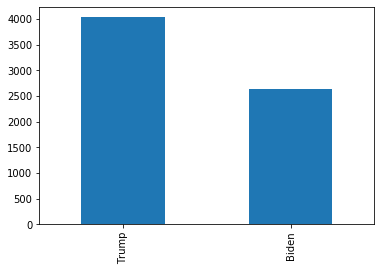

In [26]:
print(df.subject.value_counts())
df.subject.value_counts().plot(kind='bar')

In [27]:
df['count']=1
grouped = df.groupby(['time_created', 'subject'])
grouped = grouped['count'].sum().reset_index()
grouped.tail()

,time_created,subject,count
0,2020-10-12,Biden,2648
1,2020-10-12,Trump,4035


In [28]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [29]:
df = df[df['location'].notnull()]

In [30]:
df.head()

,id,text,location,subject,time_created,count
0,1315780274890903560,"“I’m running as a proud Democrat, for the Sen...",Nigeria,Biden,2020-10-12,1
3,1315780274677051399,Not the point. Biden is telling voters they ...,Near the coffee ☕️,Biden,2020-10-12,1
4,1315780274731585536,Vice President : Where Joe Biden is talking a...,Tarheel State,Biden,2020-10-12,1
5,1315780275004149761,Breaking: President Trump has tested negative...,Oklahoma,Trump,2020-10-12,1
8,1315780274995724288,. has tested positive... for Trump Derangemen...,Monaca PA,Trump,2020-10-12,1


In [31]:
tweet_copied_df = df
for index, row in df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

In [34]:
tweet_copied_df=tweet_copied_df[['id','text','location','subject','time_created','state']]

In [35]:
tweet_copied_df

,id,text,location,subject,time_created,state
5,1315780275004149761,Breaking: President Trump has tested negative...,Oklahoma,Trump,2020-10-12,Oklahoma
9,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming
21,1315780275343749121,Gov DeSantis just entered Trump’s Sanford hat...,"Sammamish, WA",Trump,2020-10-12,Washington
22,1315780275260076034,"Hello media, the broke a story that Donald T...","New York, USA",Trump,2020-10-12,New York
24,1315780275490549760,President Trump now totally over Coronavirus....,Minnesota,Trump,2020-10-12,Minnesota
...,...,...,...,...,...,...
16280,1315781636630499328,Absolutely Austin. Trump was always going to ...,"Brooklyn, NY",Trump,2020-10-12,New York
16282,1315781636735275008,"Tony Fauci will do an interview on CNN today,...","Ocean Bluff, MA",Biden,2020-10-12,Massachusetts
16286,1315781636890320897,That’s “President Trump” sir...,Iowa,Trump,2020-10-12,Iowa
16292,1315781637137989634,should be ashamed if they allow this. It’s...,Virginia,Trump,2020-10-12,Virginia


In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUMANA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sid = SentimentIntensityAnalyzer()

In [38]:
tweets_election_df=tweet_copied_df

In [39]:
tweets_election_df.head()

,id,text,location,subject,time_created,state
5,1315780275004149761,Breaking: President Trump has tested negative...,Oklahoma,Trump,2020-10-12,Oklahoma
9,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming
21,1315780275343749121,Gov DeSantis just entered Trump’s Sanford hat...,"Sammamish, WA",Trump,2020-10-12,Washington
22,1315780275260076034,"Hello media, the broke a story that Donald T...","New York, USA",Trump,2020-10-12,New York
24,1315780275490549760,President Trump now totally over Coronavirus....,Minnesota,Trump,2020-10-12,Minnesota


In [40]:
tweets_trump = tweets_election_df[tweets_election_df.subject == 'Trump']
tweets_trump.head()

,id,text,location,subject,time_created,state
5,1315780275004149761,Breaking: President Trump has tested negative...,Oklahoma,Trump,2020-10-12,Oklahoma
21,1315780275343749121,Gov DeSantis just entered Trump’s Sanford hat...,"Sammamish, WA",Trump,2020-10-12,Washington
22,1315780275260076034,"Hello media, the broke a story that Donald T...","New York, USA",Trump,2020-10-12,New York
24,1315780275490549760,President Trump now totally over Coronavirus....,Minnesota,Trump,2020-10-12,Minnesota
38,1315780275817918465,Umpteenth reminder that in the closing days o...,"Brooklyn, NY",Trump,2020-10-12,New York


In [41]:
tweets_biden = tweets_election_df[tweets_election_df.subject == 'Biden']
tweets_biden.head()

,id,text,location,subject,time_created,state
9,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming
34,1315780275742404614,Biden says he was raised in a Black Baptist C...,"Georgia, USA",Biden,2020-10-12,Georgia
48,1315780275876421633,"Joe Biden: ""I'm running as a proud Democrat f...","Los Angeles, CA",Biden,2020-10-12,California
72,1315780277168410624,📺 NEW VIDEORetweet if you are ready to vote B...,"Fairfax, VA",Biden,2020-10-12,Virginia
87,1315780277617254401,Just to be clear Biden and Harris would be fi...,"Brookfield, MO, USA",Biden,2020-10-12,Missouri


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

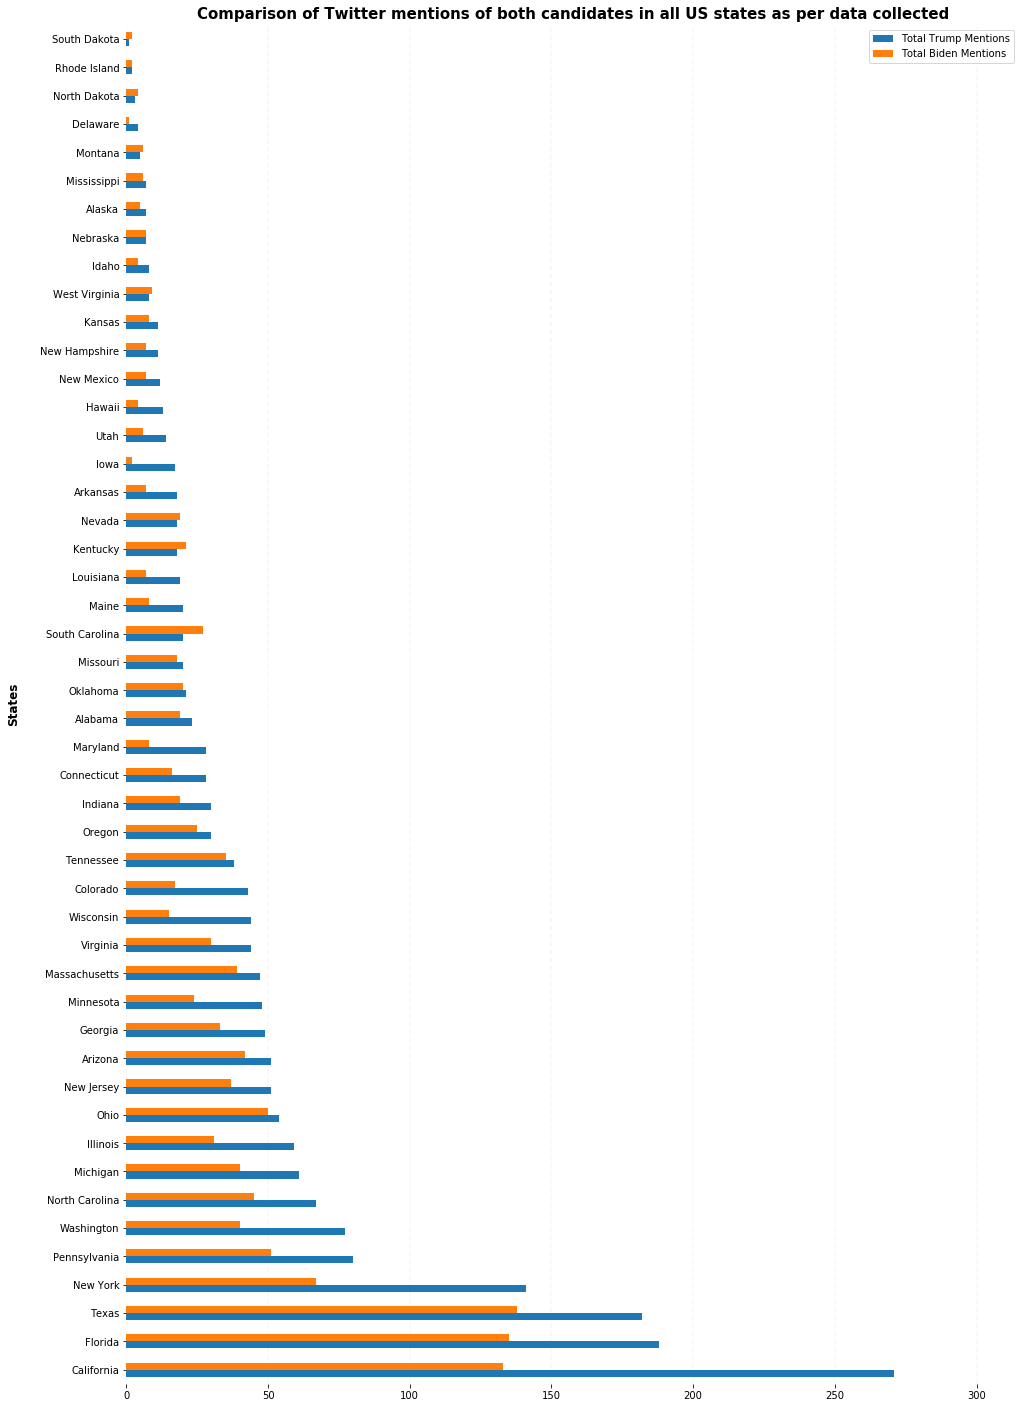

In [42]:
df1 = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df1 = df1.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df1.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

In [43]:
df1.head()

,Total Trump Mentions,Total Biden Mentions
California,271,133
Florida,188,135
Texas,182,138
New York,141,67
Pennsylvania,80,51


In [44]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [47]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,text,location,subject,time_created,state,sentiment,sentiment_overall
5,1315780275004149761,Breaking: President Trump has tested negative...,Oklahoma,Trump,2020-10-12,Oklahoma,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...",Negative
21,1315780275343749121,Gov DeSantis just entered Trump’s Sanford hat...,"Sammamish, WA",Trump,2020-10-12,Washington,"{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'comp...",Negative
22,1315780275260076034,"Hello media, the broke a story that Donald T...","New York, USA",Trump,2020-10-12,New York,"{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp...",Negative
24,1315780275490549760,President Trump now totally over Coronavirus....,Minnesota,Trump,2020-10-12,Minnesota,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",Negative
38,1315780275817918465,Umpteenth reminder that in the closing days o...,"Brooklyn, NY",Trump,2020-10-12,New York,"{'neg': 0.099, 'neu': 0.743, 'pos': 0.158, 'co...",Positive
...,...,...,...,...,...,...,...,...
16274,1315781636533952512,I just hit the live feed on of Trump’s rally...,"Washington, D.C.",Trump,2020-10-12,Washington,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",Negative
16280,1315781636630499328,Absolutely Austin. Trump was always going to ...,"Brooklyn, NY",Trump,2020-10-12,New York,"{'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'comp...",Negative
16286,1315781636890320897,That’s “President Trump” sir...,Iowa,Trump,2020-10-12,Iowa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
16292,1315781637137989634,should be ashamed if they allow this. It’s...,Virginia,Trump,2020-10-12,Virginia,"{'neg': 0.172, 'neu': 0.722, 'pos': 0.106, 'co...",Negative


In [48]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,text,location,subject,time_created,state,sentiment,sentiment_overall
9,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming,"{'neg': 0.118, 'neu': 0.763, 'pos': 0.118, 'co...",Neutral
34,1315780275742404614,Biden says he was raised in a Black Baptist C...,"Georgia, USA",Biden,2020-10-12,Georgia,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
48,1315780275876421633,"Joe Biden: ""I'm running as a proud Democrat f...","Los Angeles, CA",Biden,2020-10-12,California,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",Positive
72,1315780277168410624,📺 NEW VIDEORetweet if you are ready to vote B...,"Fairfax, VA",Biden,2020-10-12,Virginia,"{'neg': 0.203, 'neu': 0.659, 'pos': 0.137, 'co...",Negative
87,1315780277617254401,Just to be clear Biden and Harris would be fi...,"Brookfield, MO, USA",Biden,2020-10-12,Missouri,"{'neg': 0.081, 'neu': 0.775, 'pos': 0.144, 'co...",Positive
...,...,...,...,...,...,...,...,...
16255,1315781635921584128,"“I’m running as a proud Democrat, for the Sen...","Florida, USA",Biden,2020-10-12,Florida,"{'neg': 0.118, 'neu': 0.763, 'pos': 0.118, 'co...",Neutral
16258,1315781635845963777,There will be No Biden/Harris administration,"Washington, USA",Biden,2020-10-12,Washington,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",Negative
16260,1315781635942608903,"Well I can only speak for myself, but I’m goi...","Virginia, USA",Biden,2020-10-12,Virginia,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",Positive
16275,1315781636559052800,"In Cincinnati, Biden appears to be back into ...","Orofino, ID",Biden,2020-10-12,Idaho,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",Positive


In [50]:
df2=pd.concat([tweets_biden, tweets_trump], ignore_index=True, sort=False)

In [51]:
df2

,id,text,location,subject,time_created,state,sentiment,sentiment_overall
0,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming,"{'neg': 0.118, 'neu': 0.763, 'pos': 0.118, 'co...",Neutral
1,1315780275742404614,Biden says he was raised in a Black Baptist C...,"Georgia, USA",Biden,2020-10-12,Georgia,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,1315780275876421633,"Joe Biden: ""I'm running as a proud Democrat f...","Los Angeles, CA",Biden,2020-10-12,California,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",Positive
3,1315780277168410624,📺 NEW VIDEORetweet if you are ready to vote B...,"Fairfax, VA",Biden,2020-10-12,Virginia,"{'neg': 0.203, 'neu': 0.659, 'pos': 0.137, 'co...",Negative
4,1315780277617254401,Just to be clear Biden and Harris would be fi...,"Brookfield, MO, USA",Biden,2020-10-12,Missouri,"{'neg': 0.081, 'neu': 0.775, 'pos': 0.144, 'co...",Positive
...,...,...,...,...,...,...,...,...
3316,1315781636533952512,I just hit the live feed on of Trump’s rally...,"Washington, D.C.",Trump,2020-10-12,Washington,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",Negative
3317,1315781636630499328,Absolutely Austin. Trump was always going to ...,"Brooklyn, NY",Trump,2020-10-12,New York,"{'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'comp...",Negative
3318,1315781636890320897,That’s “President Trump” sir...,Iowa,Trump,2020-10-12,Iowa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3319,1315781637137989634,should be ashamed if they allow this. It’s...,Virginia,Trump,2020-10-12,Virginia,"{'neg': 0.172, 'neu': 0.722, 'pos': 0.106, 'co...",Negative


In [52]:
df3=df2[['subject','state','sentiment_overall']]

In [54]:
df3

,subject,state,sentiment_overall
0,Biden,Wyoming,Neutral
1,Biden,Georgia,Neutral
2,Biden,California,Positive
3,Biden,Virginia,Negative
4,Biden,Missouri,Positive
...,...,...,...
3316,Trump,Washington,Negative
3317,Trump,New York,Negative
3318,Trump,Iowa,Neutral
3319,Trump,Virginia,Negative


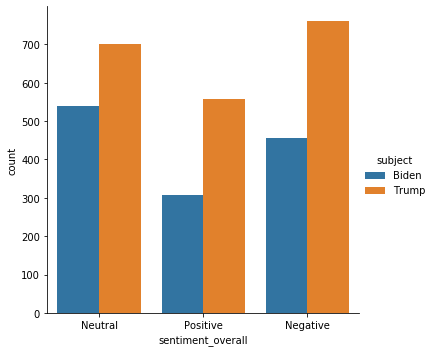

In [58]:
sns.catplot(data=df3,kind='count',x='sentiment_overall',hue='subject')

In [59]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['id']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative              5
                Neutral              11
                Positive              7
Alaska          Neutral               5
                Positive              2
Arizona         Negative             19
                Neutral              19
                Positive             13
Arkansas        Negative              5
                Neutral               5
                Positive              8
California      Negative             97
                Neutral              97
                Positive             77
Colorado        Negative             15
                Neutral              20
                Positive              8
Connecticut     Negative             14
                Neutral               9
                Positive              5
Delaware        Negative              3
                Neutral               1
Florida         Negative             64
                Neutral              72
      

In [61]:
tweets_trump_location

state          sentiment_overall
Alabama        Negative              5
               Neutral              11
               Positive              7
Alaska         Neutral               5
               Positive              2
                                    ..
West Virginia  Negative              6
               Neutral               2
Wisconsin      Negative             18
               Neutral              12
               Positive             14
Name: id, Length: 136, dtype: int64

In [63]:
tweets_trump_location.dtypes

dtype('int64')

In [64]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['id']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              5
                Neutral               6
                Positive              8
Alaska          Negative              1
                Neutral               2
                Positive              2
Arizona         Negative             11
                Neutral              23
                Positive              8
Arkansas        Negative              2
                Neutral               4
                Positive              1
California      Negative             48
                Neutral              57
                Positive             28
Colorado        Negative              7
                Neutral               6
                Positive              4
Connecticut     Negative              2
                Neutral               8
                Positive              6
Delaware        Neutral               1
Florida         Negative             47
                Neutral              52
      

In [87]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden

In [88]:
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,30,22,48,23,42,26,32,19
Alaska,29,0,71,7,40,20,40,5
Arizona,25,37,37,51,19,26,55,42
Arkansas,44,28,28,18,14,29,57,7
California,28,36,36,271,21,36,43,133
Colorado,19,35,47,43,24,41,35,17
Connecticut,18,50,32,28,38,12,50,16
Delaware,0,75,25,4,0,0,100,1
Florida,28,34,38,188,27,35,39,135


In [89]:
tweets_location_df[['Trump Positive','Trump Negative','Trump Neutral','Biden Positive','Biden Negative','Biden Neutral']]

,Trump Positive,Trump Negative,Trump Neutral,Biden Positive,Biden Negative,Biden Neutral
State,,,,,,
Alabama,30,22,48,42,26,32
Alaska,29,0,71,40,20,40
Arizona,25,37,37,19,26,55
Arkansas,44,28,28,14,29,57
California,28,36,36,21,36,43
Colorado,19,35,47,24,41,35
Connecticut,18,50,32,38,12,50
Delaware,0,75,25,0,0,100
Florida,28,34,38,27,35,39


In [90]:
tweets_location_df.columns

Index(['Trump Positive', 'Trump Negative', 'Trump Neutral', 'Trump Total',
       'Biden Positive', 'Biden Negative', 'Biden Neutral', 'Biden Total'],
      dtype='object')

In [80]:
tweets_location_df.reset_index(inplace=True)

In [91]:
tweets_location_df.head()

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,30,22,48,23,42,26,32,19
Alaska,29,0,71,7,40,20,40,5
Arizona,25,37,37,51,19,26,55,42
Arkansas,44,28,28,18,14,29,57,7
California,28,36,36,271,21,36,43,133


In [92]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})


In [94]:
tweets_location_df[['Trump Positive (in %)', 'Trump Negative (in %)',
       'Trump Neutral (in %)','Biden Positive (in %)','Biden Negative (in %)', 'Biden Neutral (in %)',
       'Predicted Judgement']]

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Predicted Judgement
State,,,,,,,
Alabama,30,22,48,42,26,32,Somewhat Democratic
Alaska,29,0,71,40,20,40,Insufficient Data
Arizona,25,37,37,19,26,55,Somewhat Republican
Arkansas,44,28,28,14,29,57,Strongly Republican
California,28,36,36,21,36,43,Somewhat Republican
Colorado,19,35,47,24,41,35,Somewhat Democratic
Connecticut,18,50,32,38,12,50,Strongly Democratic
Delaware,0,75,25,0,0,100,Insufficient Data
Florida,28,34,38,27,35,39,Strongly Republican


In [95]:
tweets_location_df.reset_index(inplace=True)

In [96]:
tweets_location_df

,State,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
0,Alabama,30,22,48,23,42,26,32,19,Somewhat Democratic
1,Alaska,29,0,71,7,40,20,40,5,Insufficient Data
2,Arizona,25,37,37,51,19,26,55,42,Somewhat Republican
3,Arkansas,44,28,28,18,14,29,57,7,Strongly Republican
4,California,28,36,36,271,21,36,43,133,Somewhat Republican
5,Colorado,19,35,47,43,24,41,35,17,Somewhat Democratic
6,Connecticut,18,50,32,28,38,12,50,16,Strongly Democratic
7,Delaware,0,75,25,4,0,0,100,1,Insufficient Data
8,Florida,28,34,38,188,27,35,39,135,Strongly Republican
9,Georgia,31,31,39,49,36,30,33,33,Strongly Democratic


In [97]:
df6=tweets_location_df.groupby('Predicted Judgement').size()

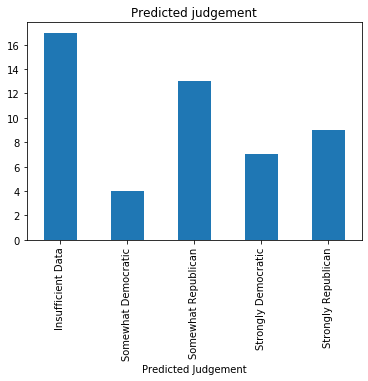

In [98]:
df6.plot.bar(title='Predicted judgement')

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

Using TensorFlow backend.


In [102]:
df2

,id,text,location,subject,time_created,state,sentiment,sentiment_overall
0,1315780274911801344,"“I’m running as a proud Democrat, for the Sen...","Wyoming, USA",Biden,2020-10-12,Wyoming,"{'neg': 0.118, 'neu': 0.763, 'pos': 0.118, 'co...",Neutral
1,1315780275742404614,Biden says he was raised in a Black Baptist C...,"Georgia, USA",Biden,2020-10-12,Georgia,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,1315780275876421633,"Joe Biden: ""I'm running as a proud Democrat f...","Los Angeles, CA",Biden,2020-10-12,California,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",Positive
3,1315780277168410624,📺 NEW VIDEORetweet if you are ready to vote B...,"Fairfax, VA",Biden,2020-10-12,Virginia,"{'neg': 0.203, 'neu': 0.659, 'pos': 0.137, 'co...",Negative
4,1315780277617254401,Just to be clear Biden and Harris would be fi...,"Brookfield, MO, USA",Biden,2020-10-12,Missouri,"{'neg': 0.081, 'neu': 0.775, 'pos': 0.144, 'co...",Positive
...,...,...,...,...,...,...,...,...
3316,1315781636533952512,I just hit the live feed on of Trump’s rally...,"Washington, D.C.",Trump,2020-10-12,Washington,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",Negative
3317,1315781636630499328,Absolutely Austin. Trump was always going to ...,"Brooklyn, NY",Trump,2020-10-12,New York,"{'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'comp...",Negative
3318,1315781636890320897,That’s “President Trump” sir...,Iowa,Trump,2020-10-12,Iowa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3319,1315781637137989634,should be ashamed if they allow this. It’s...,Virginia,Trump,2020-10-12,Virginia,"{'neg': 0.172, 'neu': 0.722, 'pos': 0.106, 'co...",Negative


In [103]:
tweets=df2[['text','subject','sentiment_overall']]

In [105]:
tweets

,text,subject,sentiment_overall
0,"“I’m running as a proud Democrat, for the Sen...",Biden,Neutral
1,Biden says he was raised in a Black Baptist C...,Biden,Neutral
2,"Joe Biden: ""I'm running as a proud Democrat f...",Biden,Positive
3,📺 NEW VIDEORetweet if you are ready to vote B...,Biden,Negative
4,Just to be clear Biden and Harris would be fi...,Biden,Positive
...,...,...,...
3316,I just hit the live feed on of Trump’s rally...,Trump,Negative
3317,Absolutely Austin. Trump was always going to ...,Trump,Negative
3318,That’s “President Trump” sir...,Trump,Neutral
3319,should be ashamed if they allow this. It’s...,Trump,Negative


In [108]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(tweets['text'].values)
X = tokenizer.texts_to_sequences(tweets['text'].values)
X = pad_sequences(X)
X[:2]

array([[  0,   0,   0,   0,   0,   0,   0,  39,  12,  16,   6,  32,  29,
          7,   1,  40,  24,  11,   4,  19,  30,  20,  22,   3,  28,  38,
         14,   5,  18,  43],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  84,  13,
         36, 485,   8,   6, 228, 600, 435, 397,   6, 560,  37, 486,  13,
         36,   6, 679, 265]])

In [ ]:
embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, 
their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and
softmax is just the right activation method for that

In [109]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
#training and testing data

Y = pd.get_dummies(tweets['sentiment_overall']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2656, 30) (2656, 3)
(665, 30) (665, 3)


In [112]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

C:\Users\SUMANA\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/15
2656/2656 [==============================] - 5s 2ms/step - loss: 1.0393 - accuracy: 0.5068
Epoch 2/15
2656/2656 [==============================] - 4s 1ms/step - loss: 0.7574 - accuracy: 0.6446
Epoch 3/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.5042 - accuracy: 0.8031
Epoch 4/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.3470 - accuracy: 0.8694
Epoch 5/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.2677 - accuracy: 0.9029
Epoch 6/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.2004 - accuracy: 0.9330
Epoch 7/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.1720 - accuracy: 0.9424
Epoch 8/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.1364 - accuracy: 0.9559
Epoch 9/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.1126 - accuracy: 0.9657
Epoch 10/15
2656/2656 [==============================] - 3s 1ms/step - loss: 0.087

In [113]:
#validation set, and measuring score and accuracy

Y_pred = model.predict_classes(X_test,batch_size = batch_size)

In [114]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[232  16  12]
 [ 17 208  12]
 [ 11  14 143]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       260
           1       0.87      0.88      0.88       237
           2       0.86      0.85      0.85       168

    accuracy                           0.88       665
   macro avg       0.87      0.87      0.87       665
weighted avg       0.88      0.88      0.88       665



In [115]:
# Separate majority and minority classes
data_majority = tweets[tweets['sentiment_overall'] == 'Negative']
data_minority = tweets[tweets['sentiment_overall'] == 'Positive']

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [116]:
print('positive data in training:',(train.sentiment_overall == 'Positive').sum())
print('negative data in training:',(train.sentiment_overall == 'Negative').sum())
print('positive data in test:',(test.sentiment_overall == 'Positive').sum())
print('negative data in test:',(test.sentiment_overall == 'Negative').sum())

positive data in training: 692
negative data in training: 974
positive data in test: 173
negative data in test: 243


In [117]:
# Separate majority and minority classes in training data for upsampling 
data_majority = train[train['sentiment_overall'] == 'Negative']
data_minority = train[train['sentiment_overall'] == 'Positive']

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",data_upsampled.sentiment_overall.value_counts(),sep = "")

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(tweets['text'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['text'].values)
X_train = pad_sequences(X_train,maxlen=29)
Y_train = pd.get_dummies(data_upsampled['sentiment_overall']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test,maxlen=29)
Y_test = pd.get_dummies(test['sentiment_overall']).values
print("x_test shape", X_test.shape)

majority class before upsample: (974, 3)
minority class before upsample: (692, 3)
After upsampling
Positive    974
Negative    974
Name: sentiment_overall, dtype: int64
x_train shape: (1948, 29)
x_test shape (416, 29)


In [118]:
# model
embed_dim = 128
lstm_out = 192

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 29, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 192)               246528    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 386       
Total params: 502,914
Trainable params: 502,914
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
batch_size = 128
# also adding weights
class_weights = {0: 1 ,
                1: 1.6/bias }
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)

C:\Users\SUMANA\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/15
1948/1948 [==============================] - 3s 1ms/step - loss: 1.0282 - accuracy: 0.4974
Epoch 2/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.8658 - accuracy: 0.5637
Epoch 3/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.5266 - accuracy: 0.8060
Epoch 4/15
1948/1948 [==============================] - 3s 1ms/step - loss: 0.3442 - accuracy: 0.8943
Epoch 5/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.2358 - accuracy: 0.9358
Epoch 6/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.1665 - accuracy: 0.9517
Epoch 7/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.1337 - accuracy: 0.9579
Epoch 8/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0988 - accuracy: 0.9779
Epoch 9/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0722 - accuracy: 0.9810
Epoch 10/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.060

In [120]:
Y_pred = model.predict_classes(X_test,batch_size = batch_size)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[226  17]
 [ 33 140]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       243
           1       0.89      0.81      0.85       173

    accuracy                           0.88       416
   macro avg       0.88      0.87      0.87       416
weighted avg       0.88      0.88      0.88       416



In [121]:
# running model to few more epochs
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)
Y_pred = model.predict_classes(X_test,batch_size = batch_size)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

Epoch 1/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0243 - accuracy: 0.9949
Epoch 2/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0156 - accuracy: 0.9990
Epoch 3/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0118 - accuracy: 0.9990
Epoch 4/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0267 - accuracy: 0.9959
Epoch 5/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0142 - accuracy: 0.9979
Epoch 6/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0221 - accuracy: 0.9938
Epoch 7/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0141 - accuracy: 0.9969
Epoch 8/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0078 - accuracy: 0.9990
Epoch 9/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.0069 - accuracy: 0.9990
Epoch 10/15
1948/1948 [==============================] - 2s 1ms/step - loss: 0.013

In [124]:
scores=model.evaluate(X_test,Y_test,verbose=0)
print('Test accuracy:', scores)

Test accuracy: [0.5811690000387338, 0.879807710647583]


In [125]:
twt = ['Breaking: President Trump has tested negative']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 168  26   2  35 129 119]]
negative


In [126]:
twt = ['inaccurate facts, dont vote for him']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 49  7 81]]
negative
